In [1]:
# encoding=utf8

# Linear Regression Analysis


+ Checks residuals and  R2. Then casts to a quadratic model.


### Packages

In [3]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

### Given data

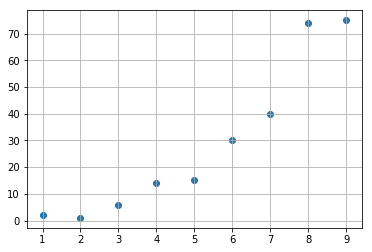

In [4]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([2, 1, 6, 14, 15, 30, 40, 74, 75])

plt.grid(True)
plt.scatter(x, y);

### Regression model

Assume the true model of the universe that generates the data looks like this:

$$Y = \beta_0 + \beta_1 X$$

We want to know what values the universe has for $\beta_0$ and $\beta_1$. Our dataset provides a guess. Find $\hat{\beta_0}$ and $\hat{\beta_1}$ in our empirical model:

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$$

### Estimate coefficients

In [5]:
# Subtract means first to make beta formula cleaner
x_ = x - x.mean()
y_ = y - y.mean()

beta1 = x_.T.dot(y_) / x_.T.dot(x_)
beta0 = y.mean() - beta1 * x.mean()

def yhat(x):
    """Return predicted value for x."""
    return beta0 + beta1 * x

In [6]:
beta1

9.9166666666666661

In [7]:
beta0

-21.027777777777771

### Fitted model

$$\hat{y} = -21.0278 + 9.9167 x$$

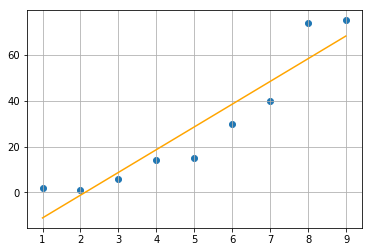

In [8]:
xs = np.arange(x.min(), x.max(), 0.01)
yhats = np.array([yhat(x) for x in xs])

plt.grid(True)
plt.scatter(x, y)  # scatter points
plt.plot(xs, yhats, c='orange');  # regression line

### Correlation coefficient

Just covariance, but rescaled to lie within $[0, 1]$. We can also see it as the cosine of the angle between the vectors $x$ and $y$ after we've subtracted the means of each.

$$r = \frac{\text{cov}(x, y)}{s_x \cdot s_y} = \frac{x^\top y}{\sqrt{x^\top x} \sqrt{y^\top y}} = \frac{x^\top y}{||x||_2 ||y||_2} = \cos(\theta)$$

Where $\theta$ is the angle between $x$ and $y$, and where $x$ and $y$ are both adjusted to have zero mean.

In [9]:
def corr(x, y):
    """Return correlation coefficient for x and y."""
    x = (x - x.mean()).copy()
    y = (y - y.mean()).copy()
    return x.T.dot(y) / (np.linalg.norm(x) * np.linalg.norm(y))

### $R^2$

Measures the proportion of variability in $y$ that is explained by $x$

In [10]:
corr(x, y) ** 2

0.87748686341253823

### Check against scipy

In [11]:
import scipy.stats
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

assert round(slope, 6) == round(beta1, 6)
assert round(intercept, 6) == round(beta0, 6)
assert round(r_value, 6) == round(corr(x, y), 6)

### Relationship between correlation coefficient $r$ and slope $\hat{\beta}_1$

$$r = \frac{x^\top y}{\sqrt{x^\top x} \sqrt{y^\top y}} = \frac{\text{cov}(x, y)}{s_x \cdot s_y}$$

$$\hat{\beta_1} = \frac{x^\top y}{x^\top x} = r \frac{\sqrt{y^\top y}}{\sqrt{x^\top x}} = r \frac{s_y}{s_x}$$

In [12]:
assert round(beta1, 6) == round(corr(x, y) * y.std() / x.std(), 6)

### Residual plot

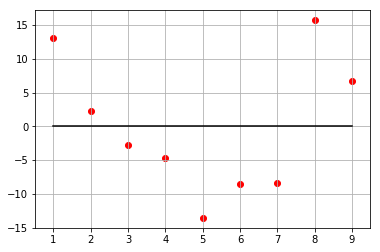

In [13]:
yhats = np.array([yhat(x) for x in x])
residuals = y - yhats

xs = np.arange(x.min(), x.max(), 0.01)
zeros = np.zeros(xs.size)

plt.grid(True)
plt.plot(xs, zeros, c='black')
plt.scatter(x, residuals, c='red');

Looks U-shaped, so try a quadratic model for better fit

### Quadratic regression model

$$\sqrt{Y} = \beta_0 + \beta_1 X$$

$$\hat{y} = (\hat{\beta}_0 + \hat{\beta}_1 x)^2$$

In [14]:
y = np.sqrt(y)

# Subtract means first to make beta formula cleaner
x_ = x - x.mean()
y_ = y - y.mean()

beta1 = x_.T.dot(y_) / x.T.dot(x_)
beta0 = y.mean() - beta1 * x.mean()

In [15]:
beta1

1.0212806174399656

In [16]:
beta0

-0.49054706070948662

### Fitted quadratratic regression model

$$\hat{y} = (-0.4906 + 1.0213 x)^2$$

### Quadratic $R^2$

In [17]:
corr(x, y) ** 2

0.95916900762832791

$R^2$ increased, so our transformation was successful

### Check against scipy

In [18]:
import scipy.stats
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

assert round(slope, 6) == round(beta1, 6)
assert round(intercept, 6) == round(beta0, 6)
assert round(r_value, 6) == round(corr(x, y), 6)

### Quadratic residual plot

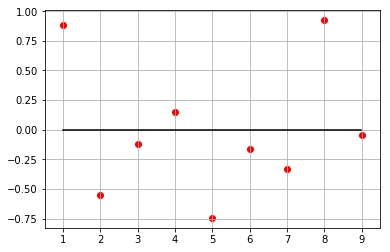

In [19]:
yhats = np.array([yhat(x) for x in x])
residuals = y - yhats

xs = np.arange(x.min(), x.max(), 0.01)
zeros = np.zeros(xs.size)

plt.grid(True)
plt.plot(xs, zeros, c='black')
plt.scatter(x, residuals, c='red');